In [1]:
DATA_PATH = '../../data/text mining/topics'

In [2]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 700)

In [3]:
# glob을 활용해 데이터 디렉토리 내에 있는 .data 파일 불러오기
all_files = glob.glob(os.path.join(DATA_PATH, "*.data"))

# 파일 이름
file_names = []

# 내용
contents = []

for data_file in all_files:

  temp_df = pd.read_table(data_file, index_col=None, header=0, encoding='latin1')

  # 파일명 가져오기
  file_name = data_file.split("/")[-1]
  file_name = file_name.split(".")[0]

  # 파일명 리스트와 내용 리스트에 각각 내용을 저장
  file_names.append(file_name)
  contents.append(temp_df.to_string())

doc_df = pd.DataFrame({"filename" : file_names, "content": contents})
doc_df.head()

,filename,content
0,topics\accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi..."
1,topics\bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ..."
2,topics\battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ..."
3,topics\battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...
4,topics\battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now..."


문서의 주제
- 호텔
- 자동차
- IT기기

## 전처리

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [7]:
# 사용자 지정 tokenizer 정의
# 문장 하나에 대한 토큰화 처리 로직
def my_tokenizer(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]

## TfidfVectorizer

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=my_tokenizer, # tfidf 에게 커스텀 토크나이저를 사용하도록 설정
    ngram_range=(1,2),
    min_df=0.05, # 단어의 등장 빈도에 대한 필터링
    max_df=0.95
)

feature_vector = tfidf_vectorizer.fit_transform(doc_df['content'])
feature_vector

<51x5475 sparse matrix of type '<class 'numpy.float64'>'
	with 40076 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.cluster import KMeans

# 3개의 군집 생성 (주제가 3개인 것을 알고 있기 때문에)
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=42)
km_cluster.fit(feature_vector)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [11]:
# cluster 레이블 확인
cluster_labels = km_cluster.labels_
cluster_labels

array([0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 1, 0, 0, 0])

In [12]:
# centroid 확인
# "군집의 무게중심" : 군집을 대표할 수 있는 지점
cluster_centroids = km_cluster.cluster_centers_
cluster_centroids # centroid 에서의 단어 중요도

array([[0.00122224, 0.00122224, 0.00122224, ..., 0.        , 0.00044467,
        0.        ],
       [0.00287498, 0.00287498, 0.00287498, ..., 0.        , 0.        ,
        0.        ],
       [0.0026872 , 0.0026872 , 0.0026872 , ..., 0.00168753, 0.00697576,
        0.00135381]])

In [13]:
doc_df['cluster_label'] = cluster_labels
doc_df.sort_values(by='cluster_label')

,filename,content,cluster_label
0,topics\accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
48,topics\updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",0
44,topics\speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",0
43,topics\speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,0
42,topics\sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1 ...,0
41,topics\size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",0
36,topics\screen_netbook_1005ha,Keep in mind that once you get in a room full of light or step outdoors screen reflections could become annoying .\n0 I've used mine outsi...,0
35,topics\screen_ipod_nano_8gb,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ...",0
34,topics\screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,0
33,topics\satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",0


* 군집 별로 대체적으로 같은 주제들이 모였다

## 군집 별 핵심 단어 추출
* cluster 의 centroid 에서 tf-idf 가 가장 높은 단어 추출
* **행렬이 어떻게 변화하는지 생각**

In [17]:
# cluster_model : 군집 모델
# cluster_data : 데이터 프레임
# feature_names : 단어 목록
# cluster_num : 클러스터 개수
# top_n_features : 대표 단어 몇 개를 볼 것인지 결정

def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):
    # top N feature, 파일 이름. feature tf-idf 값
    cluster_details = {}

    # cluster 의 centroid 좌표 추출
    cluster_centroid = cluster_model.cluster_centers_

    # centroid 좌표의 가장 큰 값이 그 군집의 핵심 단어가 된다고 볼 수 있다
    # argsort : 배열의 요소를 정렬한 후, 정렬된 배열의 원래 인덱스를 반환
    center_features = cluster_centroid.argsort()[:, ::-1] # axis=1 방향에서 모두 가져오되, 내림차순 정렬로 reverse

    # 각 군집별 순환을 통해 핵심 단어와 feature 값 (tf-idf 값), 각 군집에 속한 파일 이름 추출
    for c_num in range(cluster_num):
        # 군집 별 데이터를 담을 준비
        cluster_details[c_num] = {}
        cluster_details[c_num]['cluster'] = c_num # 클러스터 번호 담기
        # 핵심 단어 목록 담기 (top n개)
        top_n_feature_indexes = center_features[c_num, :top_n_features]
        top_features = [feature_names[idx] for idx in top_n_feature_indexes]
        cluster_details[c_num]['top_features'] = top_features
        # 핵심이 되는 단어들의 tf-idf 값
        top_n_feature_values = cluster_centroid[c_num, top_n_feature_indexes].tolist()
        cluster_details[c_num]['top_feature_value'] = top_n_feature_values
        # 군집에 포함된 파일명 담기
        file_names = cluster_data[cluster_data['cluster_label'] == c_num]['filename']
        file_names = file_names.tolist()

        cluster_details[c_num]['filenames'] = file_names

    return cluster_details

In [18]:
cluster_detail_info = get_cluster_details(
    cluster_model = km_cluster,
    cluster_data = doc_df,
    feature_names = tfidf_vectorizer.get_feature_names_out(), # get_feature_names_out : tfidf 의 단어 목록
    cluster_num=3
)

pd.DataFrame(cluster_detail_info)

,0,1,2
cluster,0,1,2
top_features,"[screen, battery, keyboard, battery life, life, video, direction, voice, feature, size]","[interior, seat, mileage, comfortable, gas, gas mileage, transmission, car, performance, quality]","[room, hotel, service, staff, food, location, price, bathroom, clean, parking]"
top_feature_value,"[0.13713039713248437, 0.12096096822171234, 0.06438043116983094, 0.06435256843586211, 0.05955147197759063, 0.055034469999818564, 0.05392569077083271, 0.05211831664179642, 0.05187770412723844, 0.05142358835940106]","[0.2230524658543701, 0.188970542996851, 0.17193138205939273, 0.12209698558076137, 0.11878932687600377, 0.11290839434599483, 0.1024927264248041, 0.09762331306326875, 0.09295950080989268, 0.08915442463334126]","[0.24572395694776825, 0.18595610748774377, 0.16546429395541795, 0.14034079774435512, 0.11830615104727037, 0.11612356944986658, 0.09545910090919835, 0.06901128555078548, 0.06564246179885792, 0.05234324152708872]"
filenames,"[topics\accuracy_garmin_nuvi_255W_gps, topics\battery-life_amazon_kindle, topics\battery-life_ipod_nano_8gb, topics\battery-life_netbook_1005ha, topics\buttons_amazon_kindle, topics\directions_garmin_nuvi_255W_gps, topics\display_garmin_nuvi_255W_gps, topics\eyesight-issues_amazon_kindle, topics\features_windows7, topics\fonts_amazon_kindle, topics\keyboard_netbook_1005ha, topics\navigation_amazon_kindle, topics\performance_netbook_1005ha, topics\satellite_garmin_nuvi_255W_gps, topics\screen_garmin_nuvi_255W_gps, topics\screen_ipod_nano_8gb, topics\screen_netbook_1005ha, topics\size_asus_netbook_1005ha, topics\sound_ipod_nano_8gb, topics\speed_garmin_nuvi_255W_gps, topics\speed_windows7,...","[topics\comfort_honda_accord_2008, topics\comfort_toyota_camry_2007, topics\gas_mileage_toyota_camry_2007, topics\interior_honda_accord_2008, topics\interior_toyota_camry_2007, topics\mileage_honda_accord_2008, topics\performance_honda_accord_2008, topics\quality_toyota_camry_2007, topics\seats_honda_accord_2008, topics\transmission_toyota_camry_2007]","[topics\bathroom_bestwestern_hotel_sfo, topics\food_holiday_inn_london, topics\food_swissotel_chicago, topics\free_bestwestern_hotel_sfo, topics\location_bestwestern_hotel_sfo, topics\location_holiday_inn_london, topics\parking_bestwestern_hotel_sfo, topics\price_amazon_kindle, topics\price_holiday_inn_london, topics\rooms_bestwestern_hotel_sfo, topics\rooms_swissotel_chicago, topics\room_holiday_inn_london, topics\service_bestwestern_hotel_sfo, topics\service_holiday_inn_london, topics\service_swissotel_hotel_chicago, topics\staff_bestwestern_hotel_sfo, topics\staff_swissotel_chicago]"


## 문서 유사도
* 대부분 코사인 유사도 활용

In [26]:
doc_list = ['맛있는 사과 사과 사과 바나나',
            '사과 사과 바나나 오렌지 멜론 사과',
            '이게 제가 할 일이에요? 사과']
# 1, 2번 문장 간의 유사도가 높을 것이라고 예상

In [27]:
# text vectorization
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
feature_vect_simple

<3x8 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [29]:
# tf-idf 값 확인
pd.DataFrame(
    feature_vect_simple.toarray(), 
    columns=tfidf_vect_simple.get_feature_names_out()
)

,맛있는,멜론,바나나,사과,오렌지,이게,일이에요,제가
0,0.460392,0.0000,0.350140,0.815745,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.4182,0.318052,0.740987,0.4182,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.000000,0.322745,0.0000,0.546454,0.546454,0.546454


In [31]:
# 문장 끼리의 유사도 확인
# R^(3*8) 과 R^(8*3) 의 내적 => R^(3*3)
from sklearn.metrics.pairwise import cosine_similarity

similarity_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
similarity_pair

array([[1.        , 0.71581911, 0.26327739],
       [0.71581911, 1.        , 0.23914936],
       [0.26327739, 0.23914936, 1.        ]])

2번 클러스터와 비슷한 문서를 찾기

In [33]:
# 2번 클러스터의 문서들의 인덱스 추출
cluster_2_indexes = doc_df.loc[doc_df['cluster_label'] == 2].index
cluster_2_indexes

Index([1, 13, 14, 15, 20, 21, 24, 27, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

In [34]:
compare_docname = doc_df.iloc[cluster_2_indexes[0]]['filename']
compare_docname

'topics\\bathroom_bestwestern_hotel_sfo'

In [36]:
similarity_pair = cosine_similarity(
    feature_vector[cluster_2_indexes[0]], # 기준으로 삼을 2번 클러스터의 문서의 벡터 
    feature_vector[cluster_2_indexes] # 2번 클러스터의 모든 문서의 벡터들
)
print(similarity_pair)

[[1.         0.04657922 0.05671051 0.06642252 0.06475482 0.06601589
  0.03864491 0.02765399 0.11557308 0.39248719 0.34104818 0.48403281
  0.11959416 0.1418975  0.14373762 0.09521268 0.07867912]]


In [39]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:] # 자기 자신 제외
sorted_index

array([[11,  9, 10, 14, 13, 12,  8, 15, 16,  3,  5,  4,  2,  1,  6,  7]],
      dtype=int64)

In [40]:
# 유사도가 큰 순으로 cluster_2_indexes 추출하여 재정렬
cluster2_sorted_indexes = cluster_2_indexes[sorted_index.reshape(-1)]
cluster2_sorted_indexes

Index([32, 30, 31, 40, 39, 38, 28, 45, 46, 15, 21, 20, 14, 13, 24, 27], dtype='int64')

In [41]:
# 실제 유사도 정렬
cluster2_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
cluster2_sim_value = cluster2_sim_value[1:]
cluster2_sim_value

array([0.48403281, 0.39248719, 0.34104818, 0.14373762, 0.1418975 ,
       0.11959416, 0.11557308, 0.09521268, 0.07867912, 0.06642252,
       0.06601589, 0.06475482, 0.05671051, 0.04657922, 0.03864491,
       0.02765399])

In [43]:
cluster2_sim_df = pd.DataFrame()
cluster2_sim_df['filename'] = doc_df.iloc[cluster2_sorted_indexes]['filename']
cluster2_sim_df['similarity'] = cluster2_sim_value

print("클러스터 2번의 0번 문서와 가장 유사한 파일 이름 및 유사도: \n{}".format(cluster2_sim_df.iloc[0, :]))

클러스터 2번의 0번 문서와 가장 유사한 파일 이름 및 유사도: 
filename      topics\room_holiday_inn_london
similarity                          0.484033
Name: 32, dtype: object


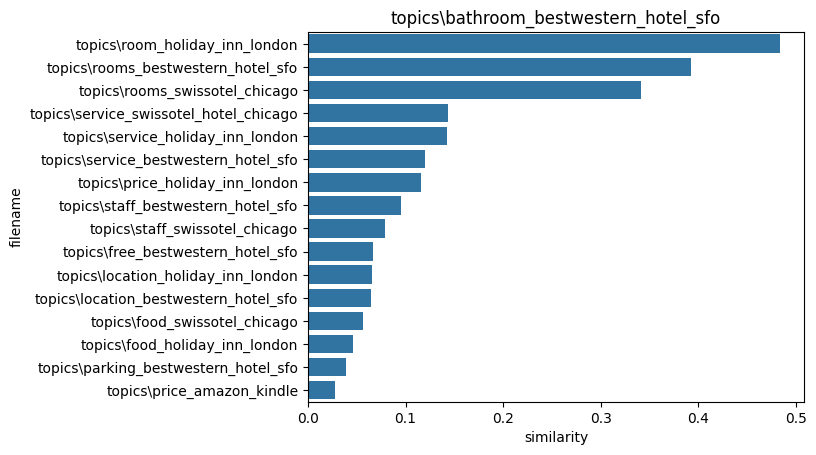

In [44]:
sns.barplot(x='similarity', y='filename', data=cluster2_sim_df)
plt.title(compare_docname)
plt.show()